In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from  sklearn.compose import ColumnTransformer

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = sns.load_dataset("mpg").dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [25]:
X = df[['cylinders' , 'displacement', 'horsepower' ,'weight','acceleration' , 'origin']]

In [26]:
y = df['mpg']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
num_features = ['displacement', 'horsepower' ,'weight' , 'acceleration']

In [34]:
cat_features = ['origin', 'cylinders']

In [35]:
preprocessor = ColumnTransformer(transformers = [
    ('num' , StandardScaler(), num_features),
    ('cat' , OneHotEncoder() , cat_features)
])

In [36]:
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model' , LinearRegression())
    ]
)

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat', OneHotEncoder(),
                                                  ['origin', 'cylinders'])])),
                ('model', LinearRegression())])

In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
print(y_pred)

[29.71884613 23.96084097 34.73513188 30.09630133 26.44787479 32.19683883
 11.86998149 31.56898331 20.2788172  32.34892072 13.80204653 23.05416606
 14.09662021 32.19241136 16.52080698 26.38418122 20.76446799 31.46057442
 27.44811835 27.39522916 21.85320017 30.51430193 33.44632128 19.61778732
 31.00627498 27.98592543 25.1961239  18.86801042 32.13979938 27.99868069
 14.78364485 20.74680878 19.25372851 30.3458453  14.58086805 33.46982819
 14.19814707 29.09972176 15.42252084  8.19500152 17.24100629 29.8176181
 30.39887038 29.01602695 13.82180206  8.23673963 19.94267534 30.35744766
 28.51537167 31.02373244 15.18529658 30.18502839 27.99172079 31.34038972
 20.5318662  17.45694713 22.09312646 21.10430774 26.91063444 30.55994024
  6.62840642 21.13919189 20.93735335 25.51731855 29.4530749  28.74736568
 26.55256221 31.04999251 21.31612357 11.21117733 28.55610727 13.56430489
 24.52436105 23.70855124 20.33822493 29.2275403  16.18914815 18.16049717
 31.42562006]


In [42]:
X_train.shape

(313, 6)

In [43]:
df.shape

(392, 9)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [46]:
r2 = r2_score(y_test, y_pred)

In [47]:
print(rmse)

3.8815697459223


In [48]:
print(r2)

0.7048116863858345


In [50]:
import matplotlib.pyplot as plt

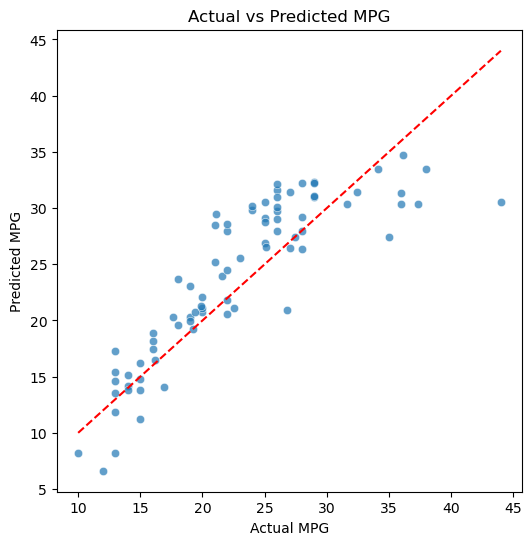

In [51]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted MPG")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


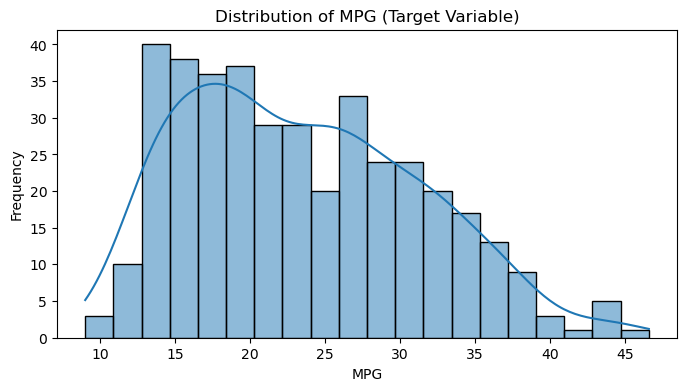

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True, bins=20)
plt.title("Distribution of MPG (Target Variable)")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


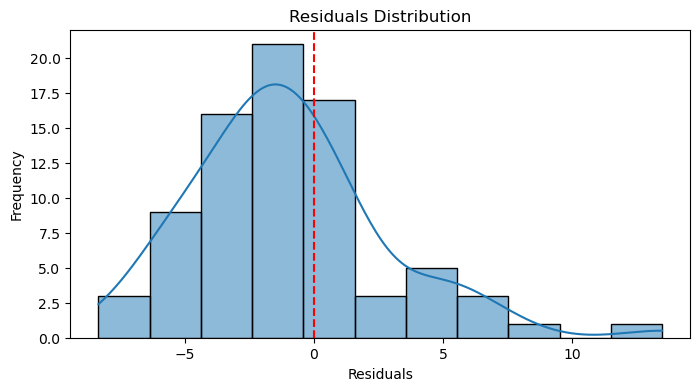

In [54]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='r', linestyle='--')
plt.show()

In [55]:
new_data = pd.DataFrame([
    {
        'displacement': 307.0,
        'horsepower': 130.0,
        'weight': 3504.0,
        'acceleration': 12.0,
        'origin': 1,    
        'cylinders': 8
    },
    {
        'displacement': 120.0,
        'horsepower': 88.0,
        'weight': 2600.0,
        'acceleration': 14.5,
        'origin': 2,
        'cylinders': 4
    },
    {
        'displacement': 98.0,
        'horsepower': 70.0,
        'weight': 2130.0,
        'acceleration': 18.0,
        'origin': 3,
        'cylinders': 4
    }
])

In [57]:
print(new_data.dtypes)

displacement    float64
horsepower      float64
weight          float64
acceleration    float64
origin            int64
cylinders         int64
dtype: object
